<a href="https://colab.research.google.com/github/tvaditya/AndroidProjects/blob/master/Classifica%C3%A7%C3%A3o_de_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de sentimentos

In [56]:
!pip install spacy==2.2.3

In [57]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 8.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [58]:
import pandas as pd
import string 
import spacy
import random
import seaborn as sns
import numpy as np

In [59]:
# Carregar a base de dados
df = pd.read_csv('/content/base_treinamento.txt', encoding='utf-8')
df.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [60]:
df.shape

(196, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


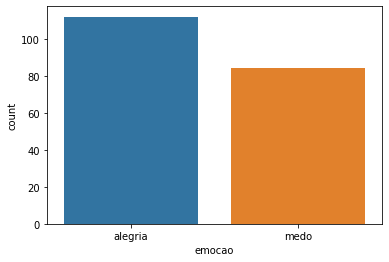

In [61]:
# Analise exploratória
sns.countplot(df['emocao'], label='Contagem');

In [62]:
# Pré-processamento dos textos
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
from spacy.lang.pt.stop_words import STOP_WORDS 
stop_words = STOP_WORDS
list(stop_words)[0:10]

['estiveste',
 'fostes',
 'está',
 'for',
 'primeira',
 'estas',
 'fora',
 'tivestes',
 'as',
 'pôde']

In [64]:
len(stop_words)

413

In [65]:
nlp = spacy.load('pt')
nlp

In [66]:
test = 'Este assunto é muito legal, não acham? Eu estou APRENdendo, aplicando, multIplIcando, divulGAndo e Replicando para todos!!!!!!!'

In [67]:
def preprocessing(txt):
  txt = txt.lower()
  doc = nlp(txt)

  lst = []
  for token in doc:
    # lst.append(token.text)
    lst.append(token.lemma_)

  return lst


In [68]:
test = preprocessing(test)
test

['este',
 'assunto',
 'ser',
 'muito',
 'legal',
 ',',
 'não',
 'achar',
 '?',
 'eu',
 'estar',
 'aprender',
 ',',
 'aplicar',
 ',',
 'multiplicar',
 ',',
 'divulgar',
 'e',
 'replicar',
 'parir',
 'todo',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!']

In [69]:
test = 'Este assunto é muito legal, não acham? Eu estou APRENdendo, aplicando, multIplIcando, divulGAndo e Replicando para todos em 1, 2, 3 e já!!!!!!!'

In [70]:
def preprocessing(txt):
  txt = txt.lower()
  doc = nlp(txt)

  lst = []
  for token in doc:
    # lst.append(token.text)
    lst.append(token.lemma_)

  lst = [element for element in lst if element not in stop_words and element not in punctuations]

  return lst

In [71]:
test = preprocessing(test)
test

['assunto',
 'legal',
 'achar',
 'aprender',
 'aplicar',
 'multiplicar',
 'divulgar',
 'e',
 'replicar',
 'parir',
 '1',
 '2',
 '3',
 'e']

In [72]:
test = 'Este assunto é muito legal, não acham? Eu estou APRENdendo, aplicando, multIplIcando, divulGAndo e Replicando para todos em 1, 2, 3 e já!!!!!!!'

def preprocessing(txt):
  txt = txt.lower()
  doc = nlp(txt)

  lst = []
  for token in doc:
    # lst.append(token.text)
    lst.append(token.lemma_)

  lst = [element for element in lst if element not in stop_words and element not in punctuations]
  lst = ' '.join([str(element) for element in lst if not element.isdigit()])

  return lst

In [73]:
test = preprocessing(test)
test

'assunto legal achar aprender aplicar multiplicar divulgar e replicar parir e'

In [74]:
df['texto'] = df['texto'].apply(preprocessing)

In [75]:
df.head()

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria


In [76]:
# tratar a classe
df_final = []

for texto, emocao in zip(df['texto'], df['emocao']):
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  df_final.append([texto, dic.copy()])

In [77]:
df_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [78]:
# Criando o classificador
model = spacy.blank('pt')

categories = model.create_pipe("textcat")
categories.add_label("ALEGRIA")
categories.add_label("MEDO")
model.add_pipe(categories)
historico = []

In [79]:
model.begin_training()
for epoch in range(300):
  random.shuffle(df_final)
  losses = {}
  for batch in spacy.util.minibatch(df_final, 30):
    txts = [model(txt) for txt, entities in batch]
    annotations = [{'cats': entities} for txt, entities in batch]
    model.update(txts, annotations, losses=losses)
  if epoch % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.0067094346159137785}
{'textcat': 1.9223349045915938e-07}
{'textcat': 5.540467373776892e-08}


In [80]:
historico

[{'textcat': 0.0067094346159137785},
 {'textcat': 1.9223349045915938e-07},
 {'textcat': 5.540467373776892e-08}]

In [81]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))
  

In [82]:
historico_loss = np.array(historico_loss)
historico_loss

array([6.70943462e-03, 1.92233490e-07, 5.54046737e-08])

Text(0, 0.5, 'Error')

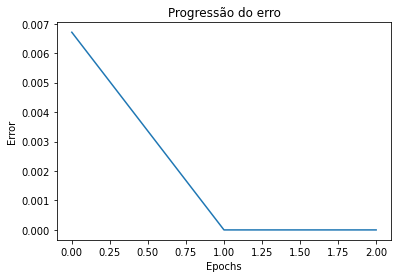

In [83]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Epochs')
plt.ylabel('Error')

In [84]:
model.to_disk("model")

In [85]:
#  Carregar modelo
model_loading = spacy.load("model")
model_loading

In [86]:
teste = "Eu adoro a cor dos meus olhos."

In [87]:
text = preprocessing(teste)
text

'adorar o cor olho'

In [88]:
model_loading(text)

adorar o cor olho

In [89]:
model_loading(text).cats

{'ALEGRIA': 0.9987474679946899, 'MEDO': 4.539786823443137e-05}

In [90]:
teste = "Isso me assusta"

In [91]:
text = preprocessing(teste)
text

'assustar'

In [92]:
model_loading(text).cats

{'ALEGRIA': 0.017216285690665245, 'MEDO': 0.9999545812606812}

In [93]:
predictions = []

for texto in df['texto']:

  prediction = model_loading(text)
  predictions.append(prediction.cats)

In [94]:
predictions[0]

{'ALEGRIA': 0.017216285690665245, 'MEDO': 0.9999545812606812}

In [95]:
final_preds = []
for pred in predictions:
  if pred['ALEGRIA'] > pred['MEDO']:
    final_preds.append('alegria')
  else:
    final_preds.append('medo')

final_preds = np.array(final_preds)



In [96]:
final_preds

array(['medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
      